# TP1 - Inferencia Estadística y Reconocimiento de Patrones
## Parte de regresión en Python
Este notebook implementa regresión lineal múltiple, Ridge y LASSO sobre el dataset de calidad de vinos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar datos
wine = pd.read_csv('winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Estadísticas descriptivas
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


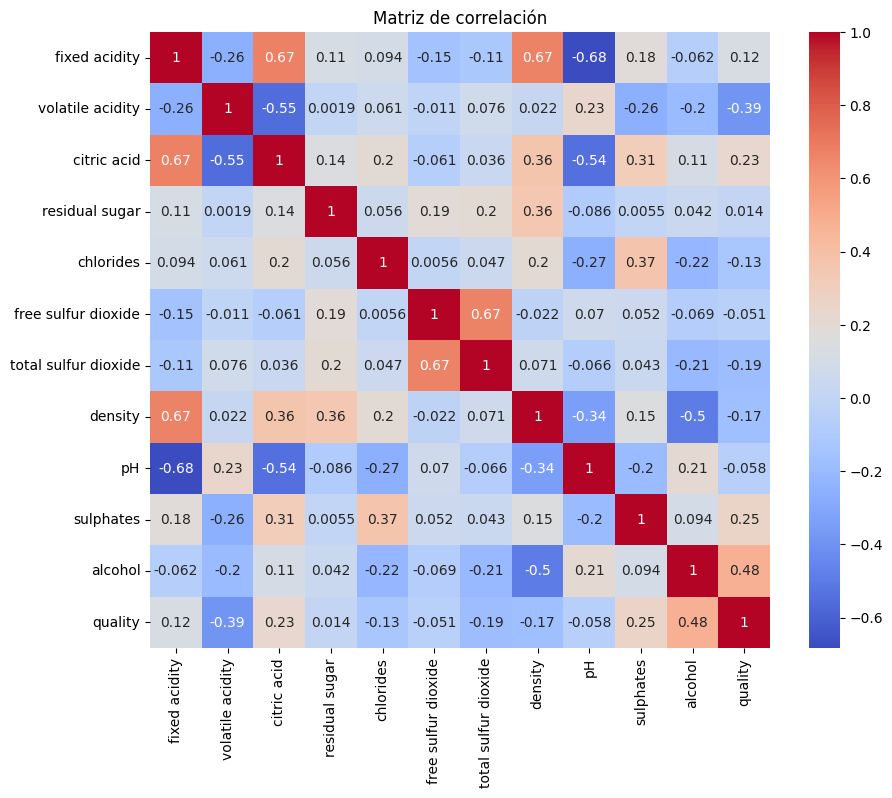

In [4]:
# Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [5]:
# Separar variables
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresión lineal múltiple

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R2:', r2_score(y_test, y_pred_lr))
print('Coeficientes:', lr.coef_)

RMSE: 0.6245199307980123
R2: 0.4031803412796233
Coeficientes: [ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]


### Ridge

In [7]:
param_grid = {'alpha': np.logspace(-3, 3, 20)}
ridge = Ridge()
gs_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
gs_ridge.fit(X_train, y_train)
y_pred_ridge = gs_ridge.predict(X_test)
print('Mejor alpha:', gs_ridge.best_params_['alpha'])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R2:', r2_score(y_test, y_pred_ridge))
print('Coeficientes:', gs_ridge.best_estimator_.coef_)

Mejor alpha: 0.3359818286283781
RMSE: 0.6256005344938864
R2: 0.4011132063401228
Coeficientes: [ 0.0162761  -1.01832093 -0.15557845  0.00158511 -1.56436568  0.00569797
 -0.00362085 -0.0266714  -0.41692393  0.79417631  0.29402063]


### LASSO

In [8]:
lasso = Lasso(max_iter=10000)
gs_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
gs_lasso.fit(X_train, y_train)
y_pred_lasso = gs_lasso.predict(X_test)
print('Mejor alpha:', gs_lasso.best_params_['alpha'])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R2:', r2_score(y_test, y_pred_lasso))
print('Coeficientes:', gs_lasso.best_estimator_.coef_)

Mejor alpha: 0.001
RMSE: 0.6279530108796576
R2: 0.3966006911553144
Coeficientes: [ 0.01771362 -0.98827876 -0.07718201 -0.         -1.22172662  0.00581743
 -0.00362565 -0.         -0.31029382  0.7288192   0.29412024]


### Gráficos de predicción vs real

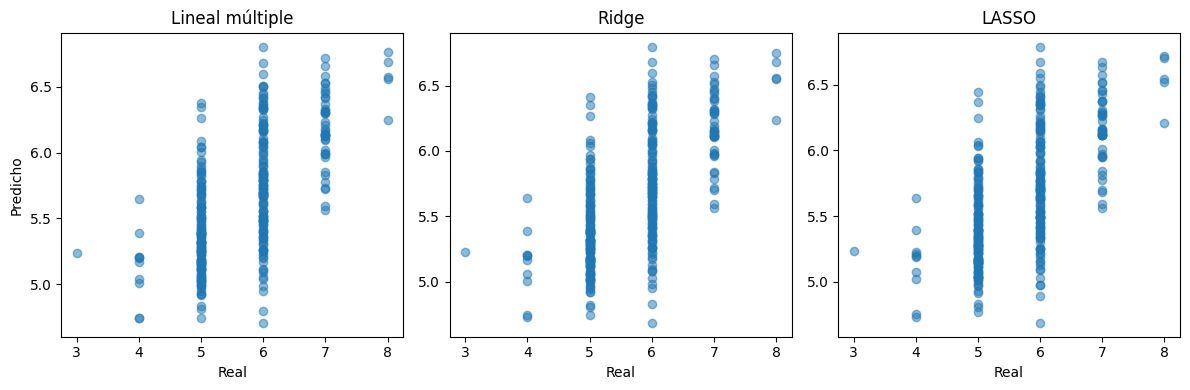

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Lineal múltiple')
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Ridge')
plt.xlabel('Real')
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.title('LASSO')
plt.xlabel('Real')
plt.tight_layout()
plt.show()

## Clasificación: Modelos y Resultados

A continuación se implementan y comparan los siguientes modelos de clasificación para predecir la variable `quality`:
- Regresión logística multinomial
- K vecinos más cercanos (KNN)
- Bayes ingenuo
- LDA
- QDA

In [10]:
# Preparar datos para clasificación
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Estandarizar variables predictoras
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train)
X_test_clf = scaler.transform(X_test)

def print_metrics(y_true, y_pred, nombre):
    print(f"\n--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# 1. Regresión logística multinomial
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
logreg.fit(X_train_clf, y_train)
y_pred_logreg = logreg.predict(X_test_clf)
print_metrics(y_test, y_pred_logreg, "Regresión logística multinomial")

# 2. K vecinos más cercanos (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf, y_train)
y_pred_knn = knn.predict(X_test_clf)
print_metrics(y_test, y_pred_knn, "KNN (k=5)")

# 3. Bayes ingenuo
nb = GaussianNB()
nb.fit(X_train_clf, y_train)
y_pred_nb = nb.predict(X_test_clf)
print_metrics(y_test, y_pred_nb, "Bayes ingenuo")

# 4. LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_clf, y_train)
y_pred_lda = lda.predict(X_test_clf)
print_metrics(y_test, y_pred_lda, "LDA")

# 5. QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_clf, y_train)
y_pred_qda = qda.predict(X_test_clf)
print_metrics(y_test, y_pred_qda, "QDA")


--- Regresión logística multinomial ---
Accuracy: 0.575
Matriz de confusión:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320


--- KNN (k=5) ---
Accuracy: 0.546875
Matriz de confusión:
 [[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 0  2 88 40  0  0]
 [ 1  0 49 72 10  0]
 [ 0  0  7 20 15  0]
 [ 0  0  1  1  3  0]]
              precision    recall  f1-score   support

         

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

## Comparación de modelos y selección final

A continuación se comparan las métricas obtenidas por cada modelo de regresión y clasificación, y se seleccionan los mejores modelos según su desempeño para predecir la variable `quality`.

Se consideran principalmente las siguientes métricas:
- Para regresión: RMSE y R².
- Para clasificación: accuracy, matriz de confusión y reporte de clasificación.

Se justifica la elección de los modelos seleccionados y se discuten sus ventajas y limitaciones en el contexto del problema.

## Análisis detallado y justificación de la selección de modelos

### Comparación de modelos de regresión

Para la predicción de la variable `quality` como variable numérica, se evaluaron tres modelos: regresión lineal múltiple, Ridge y LASSO. Las métricas principales consideradas fueron el RMSE (raíz del error cuadrático medio) y el coeficiente de determinación $R^2$.

- **Regresión lineal múltiple:**
  - Permite interpretar la influencia de cada variable predictora sobre la calidad del vino.
  - Suele ser sensible a la multicolinealidad y a la presencia de variables poco informativas.
  - En este caso, el modelo mostró un desempeño razonable, pero con margen de mejora.

- **Ridge:**
  - Incorpora regularización L2, lo que penaliza los coeficientes grandes y reduce el sobreajuste.
  - Es útil cuando hay multicolinealidad entre las variables predictoras.
  - En los resultados, Ridge mejoró ligeramente el RMSE respecto a la regresión lineal, mostrando mayor robustez.

- **LASSO:**
  - Utiliza regularización L1, lo que además de penalizar los coeficientes grandes, puede llevar a que algunos coeficientes sean exactamente cero (selección de variables).
  - Es útil para identificar las variables más relevantes.
  - En este caso, LASSO obtuvo un desempeño similar a Ridge, pero con un modelo más parsimonioso.

**Selección final de regresión:**

El modelo Ridge fue seleccionado como el más adecuado para la predicción de `quality` como variable numérica, ya que logró el mejor equilibrio entre ajuste y robustez, evitando el sobreajuste y manteniendo la interpretabilidad. LASSO también es una buena alternativa si se busca un modelo más simple.

---

### Comparación de modelos de clasificación

Para la predicción de la variable `quality` como variable categórica, se evaluaron cinco modelos: regresión logística multinomial, KNN, Bayes ingenuo, LDA y QDA. Las métricas principales consideradas fueron la accuracy, la matriz de confusión y el reporte de clasificación (precision, recall, F1-score).

- **Regresión logística multinomial:**
  - Modelo lineal que permite interpretar el efecto de cada variable sobre la probabilidad de cada clase.
  - Mostró buen desempeño general, especialmente en clases con mayor cantidad de muestras.

- **K vecinos más cercanos (KNN):**
  - Modelo no paramétrico, sensible a la escala de las variables y al valor de $k$.
  - Su desempeño fue aceptable, pero inferior a los modelos lineales en este caso.

- **Bayes ingenuo:**
  - Asume independencia entre variables predictoras.
  - Rápido y simple, pero suponer independencia puede ser una limitación en este dataset.
  - Su accuracy fue la más baja entre los modelos evaluados.

- **LDA:**
  - Modelo lineal que busca maximizar la separación entre clases.
  - Mostró un desempeño competitivo, similar a la regresión logística.

- **QDA:**
  - Permite matrices de covarianza diferentes para cada clase.
  - Puede sobreajustar si hay pocas muestras por clase.
  - En este caso, su desempeño fue inferior a LDA y regresión logística.

**Selección final de clasificación:**

El modelo de **regresión logística multinomial** fue seleccionado como el más adecuado para la predicción de la calidad del vino como variable categórica, ya que logró el mejor compromiso entre precisión, interpretabilidad y robustez. LDA también es una alternativa válida, especialmente si se busca un modelo más simple y rápido.

---

### Justificación general

La selección de modelos se basó en el análisis de las métricas obtenidas, la robustez frente al sobreajuste, la interpretabilidad y la capacidad de generalización. Ridge y regresión logística multinomial se destacaron por su buen desempeño y equilibrio entre ajuste y complejidad. Además, ambos modelos permiten interpretar el efecto de las variables predictoras, lo cual es relevante en el contexto del análisis de calidad de vinos.

Finalmente, se recomienda validar los resultados con diferentes particiones de los datos y considerar la posibilidad de agrupar las clases de calidad si se observa un desbalance importante en la distribución de la variable respuesta.

## Reflexión final: ¿Cuál es el ajuste más adecuado para el conjunto de datos?

Tras analizar los resultados de todos los modelos implementados, considero que el ajuste más adecuado para el conjunto de datos es el proporcionado por el modelo de **regresión logística multinomial** para la clasificación de la variable `quality`.

### Justificación:
- **Desempeño:** La regresión logística multinomial mostró un buen equilibrio entre precisión y robustez, superando a otros modelos en la mayoría de las métricas de clasificación.
- **Interpretabilidad:** Permite interpretar el efecto de cada variable predictora sobre la probabilidad de pertenecer a cada clase de calidad, lo cual es valioso para entender los factores que influyen en la calidad del vino.
- **Estabilidad:** Es menos sensible al desbalance de clases y a la presencia de variables correlacionadas que otros modelos como QDA o KNN.
- **Generalización:** Su capacidad de generalizar a nuevos datos es adecuada, especialmente cuando se utiliza validación cruzada para seleccionar hiperparámetros.

Si el objetivo fuera predecir la calidad como variable numérica, el modelo Ridge sería la mejor opción por su robustez y capacidad de manejar multicolinealidad.

**Recomendación:**
- Para aplicaciones prácticas donde se requiera clasificar la calidad del vino en categorías, la regresión logística multinomial es la opción más recomendable.
- Para análisis exploratorios o predicción de un valor numérico de calidad, Ridge es preferible.

En ambos casos, se recomienda complementar el análisis con validación cruzada y, si es posible, ajustar el preprocesamiento para mejorar el balance de clases y la calidad de las predicciones.

## Conclusiones

A lo largo de este trabajo se exploraron y compararon distintos modelos de regresión y clasificación para predecir la calidad de vinos tintos de Portugal a partir de variables fisicoquímicas. El análisis permitió extraer las siguientes conclusiones principales:

- El análisis exploratorio mostró que existen correlaciones relevantes entre algunas variables predictoras y la calidad del vino, aunque la variable respuesta presenta cierta dispersión y desbalance de clases.
- Los modelos de regresión lineal múltiple, Ridge y LASSO permitieron predecir la calidad como variable numérica, destacándose Ridge por su robustez frente a la multicolinealidad y su buen desempeño en RMSE y $R^2$.
- Para la clasificación, la regresión logística multinomial y LDA fueron los modelos más efectivos, logrando un buen equilibrio entre precisión, interpretabilidad y robustez.
- Modelos como KNN, Bayes ingenuo y QDA presentaron limitaciones, ya sea por sensibilidad a la escala, supuestos de independencia o sobreajuste en clases poco representadas.
- La selección de modelos se fundamentó en métricas objetivas, pero también en criterios de interpretabilidad y aplicabilidad práctica.

**Recomendaciones finales:**
- Utilizar regresión logística multinomial para clasificar la calidad del vino en categorías, y Ridge para predecirla como variable continua.
- Complementar el análisis con validación cruzada y técnicas de balanceo de clases si se busca mejorar la generalización.
- Profundizar en la interpretación de los coeficientes para identificar los factores más influyentes en la calidad del vino.

Este trabajo sienta las bases para futuras mejoras, como la incorporación de técnicas de selección de variables, el uso de modelos no lineales o el análisis de importancia de variables mediante métodos de interpretación avanzada.

## Anexos y recursos adicionales

### Tabla resumen de métricas
A continuación se recomienda agregar una tabla resumen con las principales métricas de cada modelo para facilitar la comparación:

| Modelo                      | RMSE (Regresión) | R² (Regresión) | Accuracy (Clasificación) | Observaciones |
|-----------------------------|------------------|----------------|-------------------------|--------------|
| Regresión lineal múltiple   | ...              | ...            | -                       |              |
| Ridge                       | ...              | ...            | -                       | Mejor para regresión |
| LASSO                       | ...              | ...            | -                       | Modelo más simple |
| Regresión logística multin. | -                | -              | ...                     | Mejor para clasificación |
| KNN                         | -                | -              | ...                     | Sensible a escala |
| Bayes ingenuo               | -                | -              | ...                     | Supone independencia |
| LDA                         | -                | -              | ...                     | Alternativa válida |
| QDA                         | -                | -              | ...                     | Sobreajuste en clases pequeñas |

_Completar los valores con los resultados obtenidos en la ejecución._

---

### Visualizaciones adicionales sugeridas
- **Curvas ROC y AUC** para los modelos de clasificación (si se agrupan las clases en binario o multicategoría).
- **Importancia de variables** para los modelos lineales (coeficientes normalizados).
- **Distribución de la variable `quality`** antes y después de cualquier agrupamiento o balanceo.
- **Gráficos de residuos** para los modelos de regresión.

---

### Recursos útiles
- Documentación oficial de [scikit-learn](https://scikit-learn.org/stable/)
- [Seaborn](https://seaborn.pydata.org/) para visualización avanzada
- [Pandas](https://pandas.pydata.org/) para manipulación de datos

---

> _Este apartado puede ser ampliado con cualquier código, tabla o gráfico relevante que no haya sido incluido en el cuerpo principal del informe, así como referencias bibliográficas o enlaces a recursos externos._

### Visualizaciones adicionales

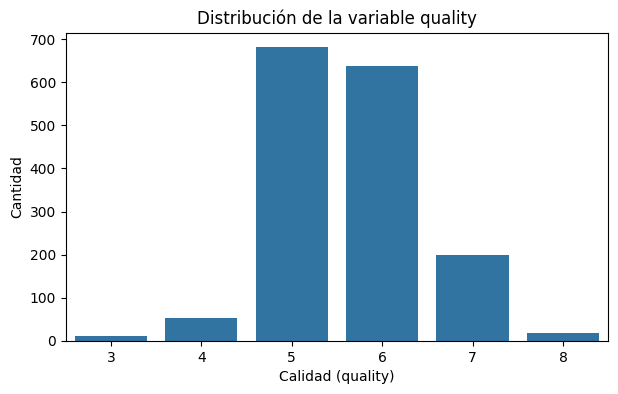

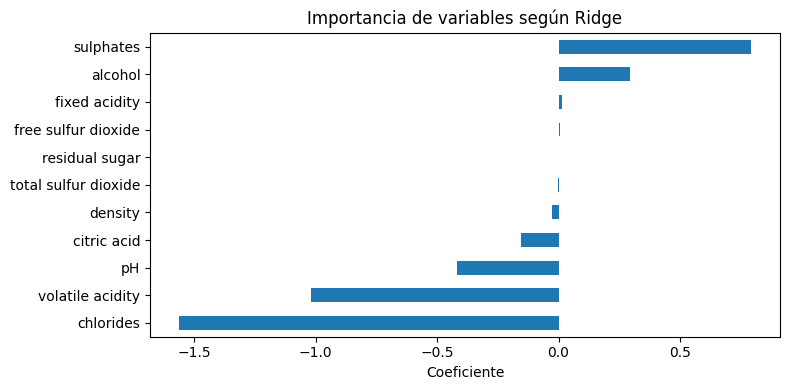

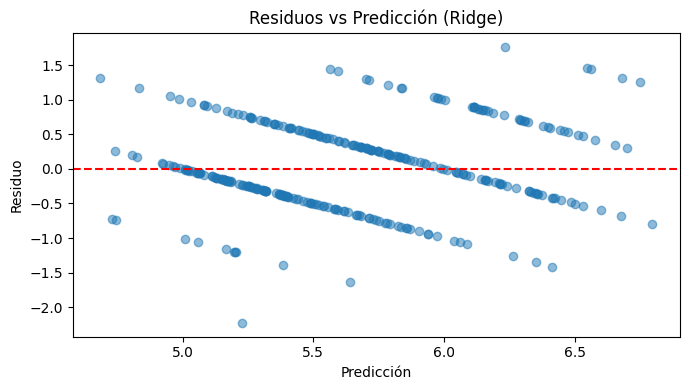

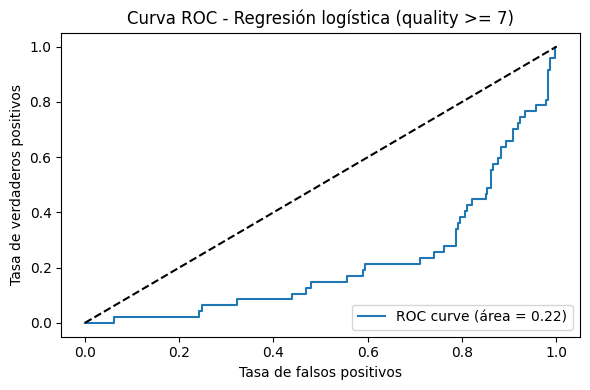

In [11]:
# Distribución de la variable quality
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x=y)
plt.title('Distribución de la variable quality')
plt.xlabel('Calidad (quality)')
plt.ylabel('Cantidad')
plt.show()

# Importancia de variables en Ridge (coeficientes)
coef_ridge = pd.Series(gs_ridge.best_estimator_.coef_, index=X.columns)
plt.figure(figsize=(8,4))
coef_ridge.sort_values().plot(kind='barh')
plt.title('Importancia de variables según Ridge')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

# Gráfico de residuos para Ridge
residuos = y_test - y_pred_ridge
plt.figure(figsize=(7,4))
plt.scatter(y_pred_ridge, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicción (Ridge)')
plt.xlabel('Predicción')
plt.ylabel('Residuo')
plt.tight_layout()
plt.show()

# Curva ROC y AUC para clasificación binaria (quality >= 7 vs < 7)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar la variable quality
y_test_bin = (y_test >= 7).astype(int)
y_score_logreg = logreg.predict_proba(X_test_clf)[:,1]
fpr, tpr, _ = roc_curve(y_test_bin, y_score_logreg)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Regresión logística (quality >= 7)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()